In [5]:

# Dataset that we will be using comes built-in with the Python Seaborn Library.

import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [20]:
#load the dataset "flights"
flight_data = sns.load_dataset("flights")

#show the first 5 datsets
print(flight_data.head(8))

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
5  1949   Jun         135
6  1949   Jul         148
7  1949   Aug         148


The dataset has three columns: year, month, and passengers.
The passengers column contains the total number of traveling passengers in a specified month.
Let's plot the shape of our dataset:

In [21]:
#what is shape of dataset? 
dataset_shape = flight_data.shape

#print the shape of the dataset
print("Dataset shape: ", dataset_shape) 


Dataset shape:  (144, 3)


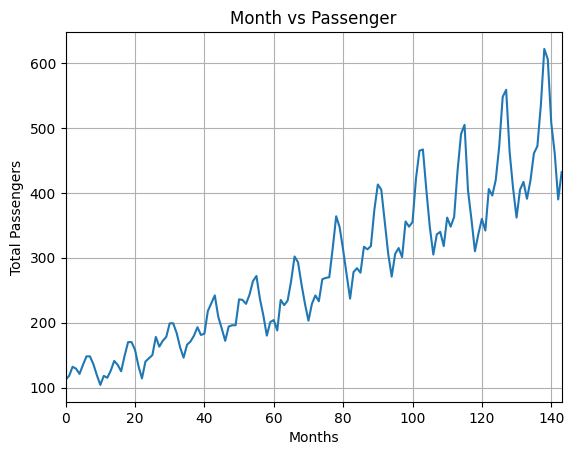

In [22]:
#plot the datset
%matplotlib inline
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(flight_data['passengers'])

# Explore the dataset

In [15]:
flight_data.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [16]:
flight_data.shape

(144, 3)

Objective:  to predict the number of passengers who traveled in the last 12 months based on first 132 months. Remember that we have a record of 144 months, which means that the data from the first 132 months will be used to train our LSTM model, whereas the model performance will be evaluated using the values from the last 12 months.

In [23]:
#change the type of the passengers column to float.
all_data = flight_data['passengers'].values.astype(float)

In [18]:
#print all_data
print(all_data)


[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


Next, we will divide our data set into training and test sets. 
The LSTM algorithm will be trained on the training set. 
The model will then be used to make predictions on the test set. 
The predictions will be compared with the actual values
in the test set to evaluate the performance of the trained model.

The first 132 records will be used to train the model and the last 12 records will be used as a test set. 

In [25]:
#divide the dataset into train and test
#similar step was followed in TD1
test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]


In [27]:
#print the test and train data. what are the shapes? 
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

#print the shapes
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data size: 132
Test data size: 12
Train data shape: (132,)
Test data shape: (12,)


In [30]:
#print the test data, to see it contains last 12 records from the all_data numpy array
print("Test data:", test_data)

Test data: [417. 391. 419. 461. 472. 535. 622. 606. 508. 461. 390. 432.]


In [31]:
# The data is not normalized. it must be normalized!!! 
##### Attnetion!!
#data normalization is only applied on the training data and not on the test data.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))
train_data_normalized

array([[-0.96483516],
       [-0.93846154],
       [-0.87692308],
       [-0.89010989],
       [-0.92527473],
       [-0.86373626],
       [-0.80659341],
       [-0.80659341],
       [-0.85934066],
       [-0.93406593],
       [-1.        ],
       [-0.93846154],
       [-0.95164835],
       [-0.9032967 ],
       [-0.83736264],
       [-0.86373626],
       [-0.90769231],
       [-0.8021978 ],
       [-0.70989011],
       [-0.70989011],
       [-0.76263736],
       [-0.87252747],
       [-0.95604396],
       [-0.84175824],
       [-0.81978022],
       [-0.7978022 ],
       [-0.67472527],
       [-0.74065934],
       [-0.7010989 ],
       [-0.67472527],
       [-0.58241758],
       [-0.58241758],
       [-0.64835165],
       [-0.74505495],
       [-0.81538462],
       [-0.72747253],
       [-0.70549451],
       [-0.66593407],
       [-0.60879121],
       [-0.66153846],
       [-0.65274725],
       [-0.4989011 ],
       [-0.44615385],
       [-0.39340659],
       [-0.53846154],
       [-0

In [32]:
#print the first 5 and last 5 records of our normalized train data.
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.96483516]
 [-0.93846154]
 [-0.87692308]
 [-0.89010989]
 [-0.92527473]]
[[1.        ]
 [0.57802198]
 [0.33186813]
 [0.13406593]
 [0.32307692]]


In [33]:
#convert the datasets into tensors
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

#Convert our training data into sequences and corresponding labels

    You can use any sequence length and it depends upon the domain knowledge. 
    Here it is convenient to use 
    a sequence length of 12 since we have monthly data
    and there are 12 months in a year.

    If we had daily data, a better sequence length would have been 365, 
    i.e. the number of days in a year.

In [36]:
train_window = 12

     Define a function named "create_inout_sequences". 

     The function will accept the raw input data and will return a list of tuples.
     In each tuple, the first element will contain list of 12 items
     corresponding to the number of passengers traveling in 12 months, 


     the second tuple element will contain one item i.e. the number 
     of passengers in the 12+1st month.

In [37]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [38]:
#create sequences and corresponding labels for training:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

    print the length of the train_inout_seq list, 
    you will see that it contains 120 items.

    This is because though the training set contains 
    132 elements, the sequence length 
    is 12, which means that the first 
    sequence consists of the first 12 
    items and the 13th item is the label
    for the first sequence. 

    Similarly, the second sequence 
    starts from the second item and 
    ends at the 13th item, whereas the 
    14th item is the label for the second
    sequence and so on.

In [39]:
train_inout_seq[:5]

[(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
          -0.8593, -0.9341, -1.0000, -0.9385]),
  tensor([-0.9516])),
 (tensor([-0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593,
          -0.9341, -1.0000, -0.9385, -0.9516]),
  tensor([-0.9033])),
 (tensor([-0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341,
          -1.0000, -0.9385, -0.9516, -0.9033]),
  tensor([-0.8374])),
 (tensor([-0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000,
          -0.9385, -0.9516, -0.9033, -0.8374]),
  tensor([-0.8637])),
 (tensor([-0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385,
          -0.9516, -0.9033, -0.8374, -0.8637]),
  tensor([-0.9077]))]

     input_size: number of features in the input.
    Though our sequence length is 12, for each month we have only 1 value i.e. total number of passengers, 
    therefore the input size will be 1.
    
    hidden_layer_size: Specifies the number of hidden layers along with the number of neurons in each layer. 
    We will have one layer of 100 neurons.
    
    output_size: The number of items in the output, since we want to predict the number of passengers 
    for 1 month in the future, the output size will be 1.

In [40]:
#pre-processing over 
#creat LSTM
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        
        
        ##hidden_cell variable contains the previous hidden and cell state.


    def forward(self, input_seq):
        #LSTM algorithm accepts three inputs: previous hidden state, previous cell state and current input.
        
        #hidden_cell variable contains the previous hidden and cell state. 
        #input_seq is passed as a parameter, which is first passed through the lstm layer
        
        #output of the lstm layer is the hidden and cell states at current time step, along with the output.
       
         
        
        #output from the lstm layer is passed to the linear layer.
        
        
        #The predicted number of passengers is stored in the last item of the predictions list, 
        #which is returned to the calling function.
        
        return predictions[-1]

In [48]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()

        self.lstm_layer = nn.LSTM(input_size, hidden_layer_size)
        self.linear_layer = nn.Linear(hidden_layer_size, output_size)

        # Initialize the weights and biases of the LSTM and linear layers
        nn.init.uniform_(self.lstm_layer.weight_hh, a=-0.1, b=0.1)
        nn.init.uniform_(self.lstm_layer.weight_ih, a=-0.1, b=0.1)
        nn.init.uniform_(self.lstm_layer.bias_hh, a=-0.1, b=0.1)
        nn.init.uniform_(self.lstm_layer.bias_ih, a=-0.1, b=0.1)
        nn.init.uniform_(self.linear_layer.weight, a=-0.1, b=0.1)
        nn.init.uniform_(self.linear_layer.bias, a=-0.1, b=0.1)

In [51]:
import torch.nn.init as init

def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
    super().__init__()

    self.lstm_layer = nn.LSTM(input_size, hidden_layer_size)
    self.linear_layer = nn.Linear(hidden_layer_size, output_size)

    # Initialize the weights using a uniform distribution between -0.1 and 0.1
    init.uniform_(self.lstm_layer.weight_ih, -0.1, 0.1)
    init.uniform_(self.lstm_layer.weight_hh, -0.1, 0.1)
    init.uniform_(self.lstm_layer.bias_ih, -0.1, 0.1)
    init.uniform_(self.lstm_layer.bias_hh, -0.1, 0.1)
    init.uniform_(self.linear_layer.weight, -0.1, 0.1)
    init.uniform_(self.linear_layer.bias, -0.1, 0.1)
    
#instantiate the model LSTM 
model = LSTM(input_size=1, hidden_layer_size=100, output_size=1)

#chosse loss function, which one you choose? 
loss_function = nn.MSELoss()

#choose the optimizer, which one?why? 
#I choose Adam optimizer, which is a commonly used optimizer for deep learning models
optimizer = torch.optim.Adam(model.parameters())

AttributeError: 'LSTM' object has no attribute 'weight_hh'

In [8]:
#print the model structure

In [33]:
#train the model
epochs = 10

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        
        
        #generate the prediction
        y_pred = model(seq)
        
        #generate the loss
       
        #backpropagate the error
    

        #modify the weights
    

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00182940
epoch:   9 loss: 0.0021512632


    #making prediction 
    test set contains the passenger data for the last 12 months and our model is 
    trained to make predictions using a sequence length of 12.
    We will first filter the last 12 values from the training set:
    

In [34]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.12527473270893097, 0.04615384712815285, 0.3274725377559662, 0.2835164964199066, 0.3890109956264496, 0.6175824403762817, 0.9516483545303345, 1.0, 0.5780220031738281, 0.33186814188957214, 0.13406594097614288, 0.32307693362236023]


    Initially the test_inputs item will contain 12 items. 
    Inside a for loop these 12 items will be used to make predictions about the first item from the test set i.e. the item number 133.
    
    The predict value will then be appended to the test_inputs list.
    During the second iteration,
    again the last 12 items will be used as input and a new prediction 
    will be made which will then be appended to the test_inputs list again.
    
    The for loop will execute for 12 times since there are 12 elements 
    in the test set. 
    
    At the end of the loop the test_inputs list will contain 
    24 items. The last 12 items will be the predicted values for the test set

In [35]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [36]:
test_inputs[fut_pred:]

[0.5683062076568604,
 0.8367581367492676,
 1.1889691352844238,
 1.5076266527175903,
 1.7692393064498901,
 2.004335880279541,
 2.1602272987365723,
 2.141843795776367,
 1.937345266342163,
 1.640482783317566,
 1.3420203924179077,
 1.128572702407837]

    We need to convert the normalized predicted values into 
    actual predicted values. We
    can do so by passing the normalized 
    values to the inverse_transform method 
    of the min/max scaler object that we used
    to normalize our dataset.

In [37]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[460.78966224]
 [521.86247611]
 [601.99047828]
 [674.48506349]
 [734.00194222]
 [787.48641276]
 [822.95171046]
 [818.76946354]
 [772.24604809]
 [704.7098332 ]
 [636.80963928]
 [588.2502898 ]]


In [38]:
#plot
x = np.arange(132, 144, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143]


NameError: name 'x' is not defined

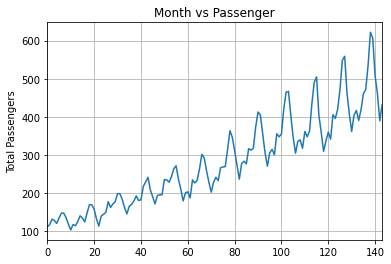

In [9]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(x,actual_predictions)
plt.show()

NameError: name 'train_window' is not defined

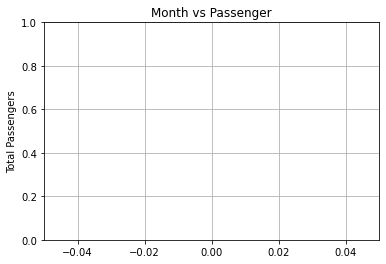

In [10]:
#plot from last and next 12 months
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(flight_data['passengers'][-train_window:])
plt.plot(x,actual_predictions)
plt.show()